<a href="https://colab.research.google.com/github/fabarroso/MVP1/blob/main/MVP1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##          **MVP1 - Acidentes Ferroviários**

Nome: Fabio de Andrade Barroso

Matricula:4052025000158

Dataset original:

https://dados.antt.gov.br/dataset/relatorio-de-acompanhamento-de-acidentes-ferroviarios-raaf/resource/3a191a68-837b-4359-bb69-93f9b8e49ff1

Acidentes ferroviários podem causar não apenas prejuízos materiais significativos, mas também colocar em risco a vida de passageiros,
trabalhadores e comunidades próximas às linhas férreas.

A análise de dados nos permite identificar padrões, causas frequentes e fatores de risco associados, possibilitando assim a implementação de medidas preventivas e a melhoria das políticas de segurança.



**Descrição do problema**


O problema consiste em analisar e explorar os dados de acidentes ferroviários no Brasil entre dezembro de 2020 e dezembro de 2024.
O dataset contém informações como data, tipo de acidente, causa presumida, região, linha, entre outros. O objetivo é identificar padrões, causas frequentes por meio da análise de variáveis envolvidas em cada ocorrência.

**Hipóteses levantadas**


*   Existe relação entre tipo de linha e gravidade do acidente?
*   Acidentes com cargas perigosas tendem a ter mais vítimas?
*   Estados ou concessionárias específicas apresentam mais casos?
*   Existe sazonalidade (mês ou hora) na ocorrência dos acidentes?
*   Existe uma estação do ano com maior número de acidentes?
*   Certos tipos de acidentes estão mais associados à fatalidades?

**Tipo de Problema**

Este é um problema de classificação, pois, a maior parte das variáveis são categóricas, tendo como os exemplos: tipo des acidente, existencia de vitimas, gravidade; permtindo assim aplicar modelos para prever classes e tomar decisões com base em categorias.

In [ ]:
## Carga de bibliotecas utilizadas
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl
from matplotlib.patches import Patch, Polygon
from matplotlib.lines import Line2D

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_colwidth', None)
pd.set_option('display.expand_frame_repr', False)

In [ ]:
##Carregamento dos Dados
# URL GitHub
url = 'https://raw.githubusercontent.com/fabarroso/acidentes-ferroviarios/main/Acidentes_Ferroviarios.csv'

# Carregamento do dataset
df = pd.read_csv(url, delimiter=';', encoding='ISO-8859-1')

# Exibe as primeiras linhas
df.head()

,Gravidade,Concessionaria,Data_Ocorrencia,Hora_Ocorrencia,UF,Municipio,Linha,Quilômetro_Inicial,Quilômetro_Final,Estação_Anterior,Estação_Posterior,Perímetro_Urbano,Causa_direta,Causa_contibutiva,Natureza,Interrupção,N_Trem,Prefixo,Double_Stack,Serviço_Transporte,N_feridos,N_obitos,Mercadoria,Equipagem,Outra_Ferrovia,PN,Prejuízo_Financeiro
0,Sim,FTL,12/01/2020,16:00,PE,Jaboatao dos Guararapes,Tronco Sul Recife,5.000,5.001,Jorge Lins,Entroncamento 1,Não,Casos Fortuitos ou de Força Maior,Animal na via,Colisão,0.0,0,NaN,NaN,NaN,0,0,NaN,NaN,NaN,Não,"918,00"
1,Não,FCA,12/03/2020,11:04,MG,Santo Antonio do Monte,Garças de Minas - Calafate,675.450,NaN,St. Amaro do Monte,Franscisco Bras,.,Casos Fortuitos ou de Força Maior,NaN,Abalroamento,0.0,1,C305,Não,Cargas,0,0,Cloreto de Potássio,Rogerio Dias da Silva,NaN,Sim,NaN
2,Não,MRS,12/04/2020,06:35,MG,Ibirite,Variante do Paraopeba,614.996,NaN,Ibirite,Jatobá,PN Augusto Spiazzi,Casos Fortuitos ou de Força Maior,NaN,Abalroamento,1.5,1,KPE1101,Não,Cargas,0,0,Container Carregado de 20,MARCELINO BASILIO,NaN,Sim,NaN
3,Sim,FTL,12/04/2020,20:30,MA,Sao Luis,Ramal de Itaqui,30.000,NaN,Pátio Esso,Itaqui,Não,Falha Humana,NaN,Colisão,9.0,1,W002,Não,Cargas,0,0,Óleos Diesel em VagõesTanque VagõesVazios de Estrada de Ferro Circulando Sobre Rodas Próprias,MARCIO ADRIANO SANTOS NUNES,NaN,Não,NaN
4,Sim,FTL,12/05/2020,16:35,CE,Crateus,Tronco Norte Fortaleza,475.000,NaN,Crateus,Ibiapaba,Não,Via Permanente,NaN,Descarrilamento,28.0,1,K107,Não,Cargas,0,0,Bobinas de Aço ou Ferro Cimento Acondicionado em Sacos Farinha de Trigo,ANTONIO EGENNALES ALVES DE MIRANDA JONAEL DE CASTRO GOMES,NaN,Sim,NaN


In [ ]:
## ANÁLISE EXPLORATORIA ##



# Dimensão do dataset
print(f"Total de linhas: {df.shape[0]}")
print(f"Total de colunas: {df.shape[1]}")

# Informações dos tipos de dados
df.info()

# Verificar valores nulos
df.isnull().sum()

Total de linhas: 2973
Total de colunas: 27
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2973 entries, 0 to 2972
Data columns (total 27 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Gravidade            2973 non-null   object 
 1   Concessionaria       2973 non-null   object 
 2   Data_Ocorrencia      2973 non-null   object 
 3   Hora_Ocorrencia      2973 non-null   object 
 4   UF                   2973 non-null   object 
 5   Municipio            2973 non-null   object 
 6   Linha                2973 non-null   object 
 7   Quilômetro_Inicial   2973 non-null   float64
 8   Quilômetro_Final     2927 non-null   float64
 9   Estação_Anterior     2973 non-null   object 
 10  Estação_Posterior    2973 non-null   object 
 11  Perímetro_Urbano     2973 non-null   object 
 12  Causa_direta         2973 non-null   object 
 13  Causa_contibutiva    2906 non-null   object 
 14  Natureza             2973 non-null   object 


,0
Gravidade,0
Concessionaria,0
Data_Ocorrencia,0
Hora_Ocorrencia,0
UF,0
Municipio,0
Linha,0
Quilômetro_Inicial,0
Quilômetro_Final,46
Estação_Anterior,0


In [ ]:
# Estatísticas descritivas
display(df.describe(include='all'))

,Gravidade,Concessionaria,Data_Ocorrencia,Hora_Ocorrencia,UF,Municipio,Linha,Quilômetro_Inicial,Quilômetro_Final,Estação_Anterior,Estação_Posterior,Perímetro_Urbano,Causa_direta,Causa_contibutiva,Natureza,Interrupção,N_Trem,Prefixo,Double_Stack,Serviço_Transporte,N_feridos,N_obitos,Mercadoria,Equipagem,Outra_Ferrovia,PN,Prejuízo_Financeiro
count,2973,2973,2973,2973,2973,2973,2973,2973.000000,2927.000000,2973,2973,2973,2973,2906,2973,2973.000000,2973.000000,2847,2853,2853,2973.000000,2973.000000,2737,2846,117,2973,1158
unique,2,13,1259,1185,22,499,116,NaN,NaN,815,827,1102,8,155,5,NaN,NaN,1744,3,8,NaN,NaN,551,1930,5,2,492
top,Não,RMS,19/03/2022,11:20,PR,Curitiba,Paranaguá - Uvaranas,NaN,NaN,D Pedro II,km 5,Não,Interferência de Terceiro,"Falta de atenção à circulação (por terceiros), Invasão da faixa de segurança (por terceiros)",Abalroamento,NaN,NaN,M17,Não,Cargas,NaN,NaN,VagõesVazios de Estrada de Ferro Circulando Sobre Rodas Próprias,ABADIO ALVES DA SILVA,MRS,Não,"120,00"
freq,1596,858,8,12,643,156,280,NaN,NaN,59,59,376,2175,426,1245,NaN,NaN,24,2849,2705,NaN,NaN,479,36,54,1622,182
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,277.398091,276.695156,NaN,NaN,NaN,NaN,NaN,NaN,4.124285,0.960309,NaN,NaN,NaN,0.337370,0.154053,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,252.120316,251.894582,NaN,NaN,NaN,NaN,NaN,NaN,12.384543,0.198680,NaN,NaN,NaN,0.936873,0.374778,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,NaN,NaN,NaN,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,98.089000,97.654500,NaN,NaN,NaN,NaN,NaN,NaN,0.100000,1.000000,NaN,NaN,NaN,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,219.326000,219.801000,NaN,NaN,NaN,NaN,NaN,NaN,1.100000,1.000000,NaN,NaN,NaN,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,375.000000,374.350500,NaN,NaN,NaN,NaN,NaN,NaN,3.200000,1.000000,NaN,NaN,NaN,1.000000,0.000000,NaN,NaN,NaN,NaN,NaN


In [ ]:
## Analise Descritiva

# Frequência da gravidade
print("🔸 Frequência das categorias de gravidade:")
display(df['Gravidade'].value_counts())

# Acidentes por UF
print("\n🔸 Número de acidentes por Unidade da Federação (UF):")
display(df['UF'].value_counts())

# Número médio de feridos e mortos
print("\n🔸 Média de feridos e óbitos por acidente:")
display(df[['N_feridos', 'N_obitos']].astype(int).mean())



🔸 Frequência das categorias de gravidade:


,count
Gravidade,
Não,1596
Sim,1377



🔸 Número de acidentes por Unidade da Federação (UF):


,count
UF,
PR,643
MG,607
SP,590
RJ,225
SC,170
BA,108
CE,108
MA,101
RS,91



🔸 Média de feridos e óbitos por acidente:


,0
N_feridos,0.337370
N_obitos,0.154053


In [ ]:
# Média
print("\nMédias das colunas numéricas:")
print(df.select_dtypes(include=np.number).mean())


Médias das colunas numéricas:
Quilômetro_Inicial    277.398091
Quilômetro_Final      276.695156
Interrupção             4.124285
N_Trem                  0.960309
N_feridos               0.337370
N_obitos                0.154053
dtype: float64


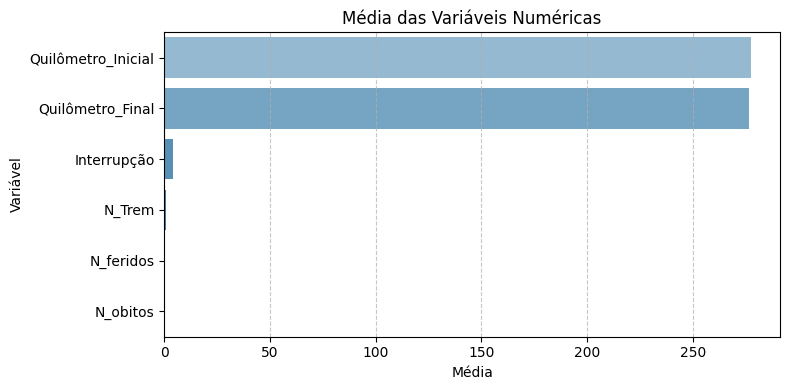

In [ ]:
#Grafico Média das Variaveis Numericas

# Calculo médias
medias = df.select_dtypes(include=np.number).mean()

# Gráfico de barras
plt.figure(figsize=(8,4))
sns.barplot(x=medias.values, y=medias.index, palette='Blues_d')

plt.title('Média das Variáveis Numéricas')
plt.xlabel('Média')
plt.ylabel('Variável')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [ ]:
#Desvio Padrão

print("\nDesvios padrão:")
print(df.select_dtypes(include=np.number).std())



Desvios padrão:
Quilômetro_Inicial    252.120316
Quilômetro_Final      251.894582
Interrupção            12.384543
N_Trem                  0.198680
N_feridos               0.936873
N_obitos                0.374778
dtype: float64


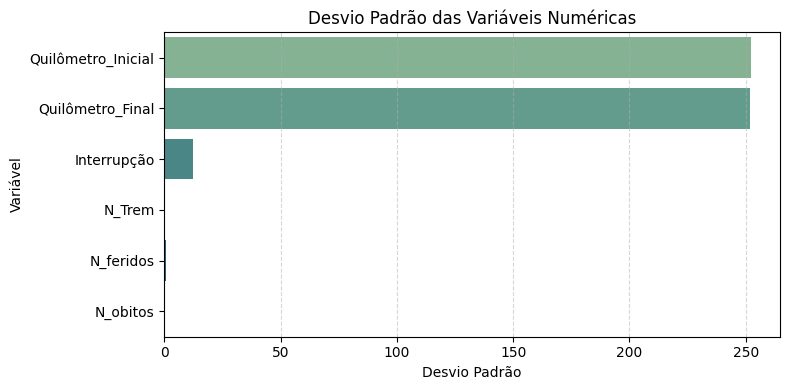

In [48]:
# Selecionar os desvios padrão calculados
stds = df.select_dtypes(include=np.number).std()

# Plotar gráfico de barras horizontais
plt.figure(figsize=(8, 4))
sns.barplot(x=stds.values, y=stds.index, palette='crest')
plt.title('Desvio Padrão das Variáveis Numéricas')
plt.xlabel('Desvio Padrão')
plt.ylabel('Variável')
plt.grid(True, axis='x', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()